In [ ]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd 
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import os
import cv2

plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !pip install git+https://github.com/wkentaro/gdown.git
 

In [ ]:
# # Download data
# import gdown 
# gdown.download_folder('https://drive.google.com/drive/folders/1DPiiOpYxiOj9xyVshp1QlwcWbHunPRLu', quiet=True)


In [ ]:
dataset = 'drive/MyDrive/Dataset'
print(os.chdir(dataset))

In [ ]:
os.listdir()

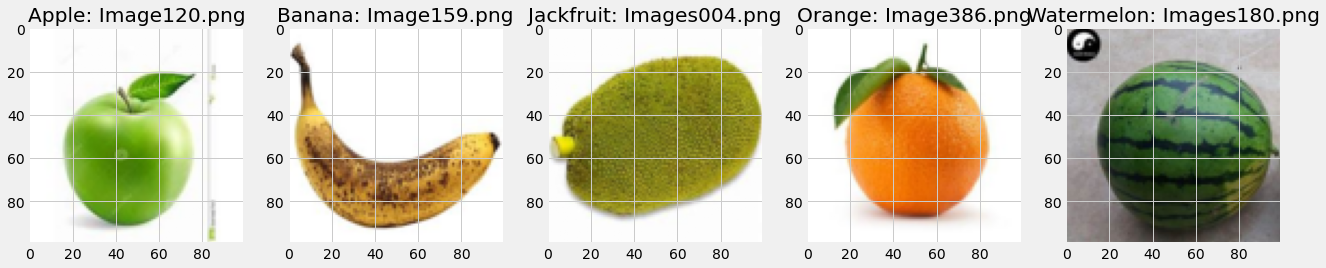

In [ ]:
# Show loaded dataset
plt.figure(figsize=(20,20))
test_folder=r''
classes = ["Apple", "Banana", "Jackfruit", "Orange", "Watermelon"]
for i in range(5):
    file = random.choice(os.listdir(classes[i]))
    image_path= os.path.join(classes[i], file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(classes[i]+": "+file)
    plt.imshow(img)

In [ ]:
# Get the file paths and create array
labels = np.array([], dtype=np.int8)

im_files = os.listdir() # List the folders
im_array = np.array([], dtype=np.float16).reshape(0,100,100,3) # Create empty np array for storing image

for i in range (len(classes)):
    im_files = os.listdir(classes[i])
    print(classes[i], len(im_files))
    fruits = [plt.imread(classes[i]+"/"+f) for f in im_files]
    img_arr = np.array(fruits)
    im_array = np.vstack((im_array, img_arr))
    labels = np.append(labels, [i for f in im_files])

# im_files = os.listdir('Apple')
# apple = [plt.imread("Apple/"+f) for f in im_files]
# img_apple = np.array(apple)

# im_files = os.listdir('Orange')
# orange = [plt.imread("Orange/"+f) for f in im_files]
# img_orange = np.array(orange)
# for i in range (len(im_files)):
#     im_files_list = os.listdir(im_files[i])
#     images_plt = [plt.imread(im_files[i]+"/"+f) for f in im_files_list]
#     images = np.array(images_plt)
#     im_array.append(images)
# Load using matplotlib
# images_plt = [plt.imread(f) for f in im_files]
# convert your lists into a numpy array of size (N, H, W, C)
# images = np.array(images_plt)
# 

Apple 200
Banana 193
Jackfruit 125
Orange 101
Watermelon 211


In [ ]:
# Reshaping labels 
labels = labels.reshape(len(im_array),1)

In [ ]:
#im_array

In [ ]:
labels

In [ ]:
classes

['Apple', 'Banana', 'Jackfruit', 'Orange', 'Watermelon']

In [ ]:
# plt.imread('Apple/Image004.png').shape

In [ ]:
#Train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(im_array, labels, test_size=0.25, random_state=1)

In [ ]:
#print(y_test)

In [ ]:
#Viewing data
print(type(x_test))
print(type(y_test))
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#shape of the arrays
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(208, 100, 100, 3)
(208, 1)
(622, 100, 100, 3)
(622, 1)


In [ ]:
#Viewing first image as array
index = 1
x_train[index]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

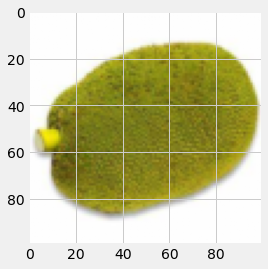

In [ ]:
#viewing first image as picture
img = plt.imshow(x_train[index])

In [ ]:
#image label
print('Image label:', y_train[index])

Image label: [2]


In [ ]:
#get image classification
classification = classes
print('Image class: ', classification[y_train[index][0]])

Image class:  Jackfruit


In [ ]:
#converting labels to set of 10 m=numbers to input into to the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#printing new labels
print('y_train:', y_train_one_hot)
print('y_test:', y_test_one_hot)

y_train: [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
y_test: [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
#New label of image above
print('One hot label :', y_train_one_hot[index])

One hot label : [0. 0. 1. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
# x_train = x_train / 255
# x_test = x_test / 255

In [ ]:
x_train[index]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
#Model architecture
model =  Sequential()
#Adding first Convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)))
#Adding 1st pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))
#Adding 2nd Convolution layer
model.add(Conv2D(64, (5,5), activation='relu'))
#Adding 2nd pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))
#Adding first flattening layer
model.add(Flatten())
#ADding Layer of 1000 nuerons
model.add(Dense(1000, activation='relu'))
#Adding a dropout layer
model.add(Dropout(0.5))
#ADding Layer of 500 nuerons
model.add(Dense(500, activation='relu'))
#Adding a dropout layer
model.add(Dropout(0.5))
#ADding Layer of 250 nuerons
model.add(Dense(250, activation='relu'))
#ADding Layer of 5 nuerons
model.add(Dense(5, activation='softmax'))

In [ ]:
#compiling model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 1000)              3

In [ ]:
model.load_weights('savedModel')

In [ ]:
#Training the model
hist = model.fit(x_train, y_train_one_hot, batch_size= 256, epochs= 30, validation_split= 0.2)

Epoch 1/30
2/2 [==============================] - 15s 7s/step - loss: 0.0557 - accuracy: 0.9839 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 15s 9s/step - loss: 0.0314 - accuracy: 0.9920 - val_loss: 0.0208 - val_accuracy: 0.9920
Epoch 3/30
2/2 [==============================] - 13s 7s/step - loss: 0.0461 - accuracy: 0.9819 - val_loss: 0.0340 - val_accuracy: 0.9920
Epoch 4/30
2/2 [==============================] - 13s 7s/step - loss: 0.0431 - accuracy: 0.9940 - val_loss: 0.0391 - val_accuracy: 0.9920
Epoch 5/30
2/2 [==============================] - 14s 7s/step - loss: 0.0566 - accuracy: 0.9859 - val_loss: 0.0285 - val_accuracy: 0.9920
Epoch 6/30
2/2 [==============================] - 14s 7s/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 7/30
2/2 [==============================] - 13s 7s/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 0.0835 - val_accuracy: 0.9840
Epoch 8/30
2/2 [==================

In [ ]:
model.save('savedModel')

In [ ]:
#Evaluating the model using test dataset
model.evaluate(x_test, y_test_one_hot)[1]

7/7 [==============================] - 2s 221ms/step - loss: 0.0226 - accuracy: 0.9952


0.995192289352417

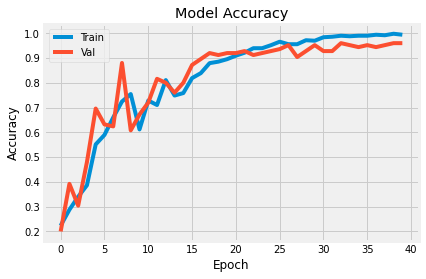

In [ ]:
#Visualizing Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

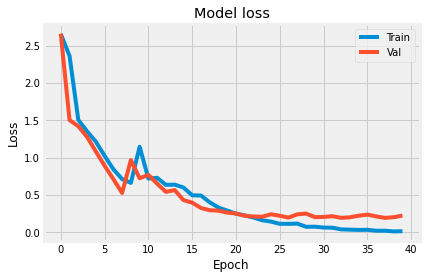

In [ ]:
#Visualizing model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
#Testing the model
from google.colab import files
uploaded = files.upload()

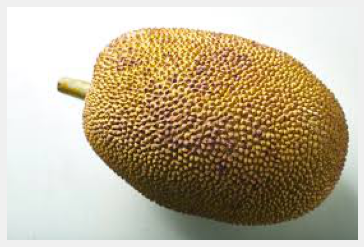

In [ ]:
#Showing image
plt.axis('off')
uploaded_img = plt.imread('jackfruit.jpg')
img = plt.imshow(uploaded_img)

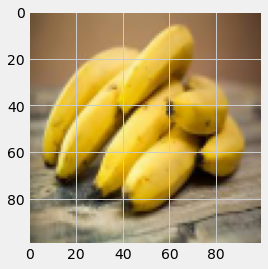

In [ ]:
#Resizing image
from skimage.transform import resize
resized_img = resize(uploaded_img, (100,100,3))
img = plt.imshow(resized_img)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
#Getting the models prediction
pred = model.predict(np.array([resized_img]))

#Showing predictions
pred

array([[0.00000016, 0.9998379 , 0.000162  , 0.00000001, 0.        ]],
      dtype=float32)

In [ ]:
#Sorting predictions descending
list_index = [0,1,2,3,4]
x = pred

for i in range(5):
  for j in range(5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
  
#showing sorted label in order
print(list_index)

[1, 2, 0, 3, 4]


In [ ]:
#print the first 5 most likely classifications
for i in range(5):
  print(classification[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

Banana : 99.9837875366211 %
Jackfruit : 0.016199990932364017 %
Apple : 1.6303762606639793e-05 %
Orange : 1.0562001939717902e-06 %
Watermelon : 2.2597310689320693e-07 %


In [ ]:
print("Predicted Class:", classification[list_index[0]])

Predicted Class: Banana


In [ ]:
#model.save('savedModel')

In [ ]:
model.summary()

In [ ]:
model.load_weights('savedModel')

In [ ]:
#Evaluating the model using test dataset
model.evaluate(x_test, y_test_one_hot)[1]

7/7 [==============================] - 2s 213ms/step - loss: 0.0555 - accuracy: 0.9904


0.9903846383094788

In [ ]:
pred = model.predict(x_test)

In [ ]:
classes

['Apple', 'Banana', 'Jackfruit', 'Orange', 'Watermelon']

In [ ]:
np.sum(y_test_one_hot, axis=0)

array([47., 47., 30., 29., 55.], dtype=float32)

* Appla = 47/47
* Banana = 47/47
* Jackfruit = 29/30
* Orange = 29/29
* Watermelon = 55/55

In [ ]:
np.set_printoptions(suppress=True, precision=1)
for i in range(len(x_test)):
    print(y_test_one_hot[i], pred[i], model.evaluate([x_test[i:i+1]], [y_test_one_hot[i:i+1]], verbose=0)[1], classes[y_test[i][0]])

[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] 1.0 Apple
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.] 1.0 Jackfruit
[0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] 1.0 Banana
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] 1.0 Banana
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.] 1.0 Jackfruit
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] 1.0 Apple
[1. 0. 0. 0. 0.] [1. 0.